In [1]:
import sys
sys.path.append('/data/home/djy4/github/MingPy/')


from Constant import *
from Dataset import *
from DPGenFlow import *


# from matplotlib.ticker import FuncFormatter
# plt.rcParams['font.family'] = ['Times New Roman']

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# DPGEN Sampling

## training

DPGenerator System contains 14 Iterations
There are 2 initial configurations for exploration: 	 
H64 		
H128 		


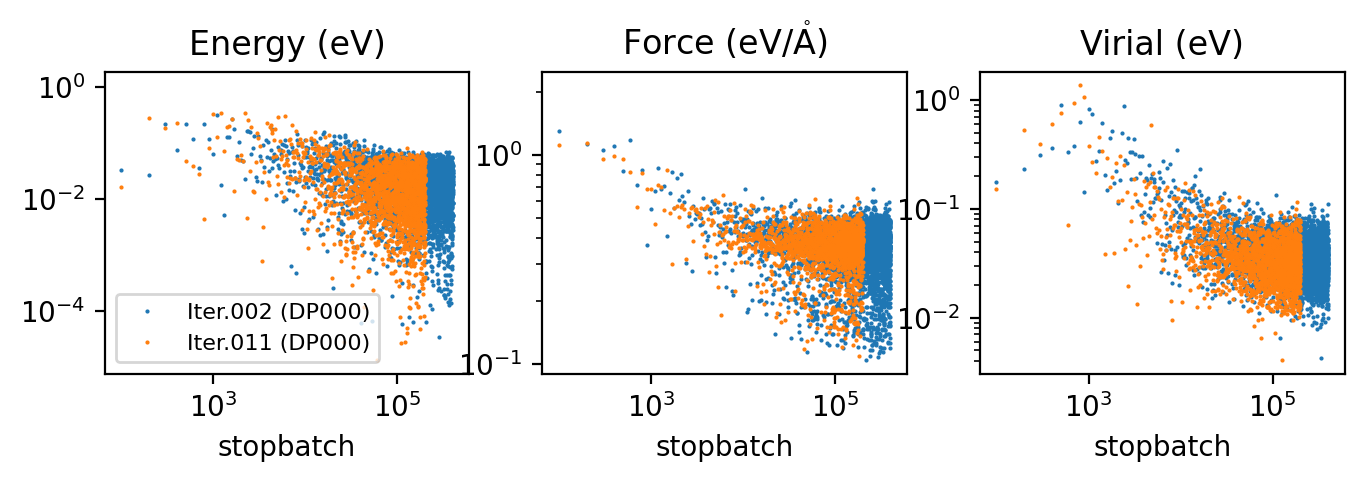

In [3]:
DIR='/data/home/djy4/work/hydrogen/dpgen/'

sys = DPGenSys(DIR)

fig, ax = plt.subplots(1,3, figsize=(8,2),dpi=200)

for i in [2,11]:
    sys._plot_lc(ax, iter_idx=i, model_idx=0)
    
ax[0].legend(fontsize=8)

## model_devi

DPGenerator System contains 14 Iterations
There are 2 initial configurations for exploration: 	 
H64 		
H128 		


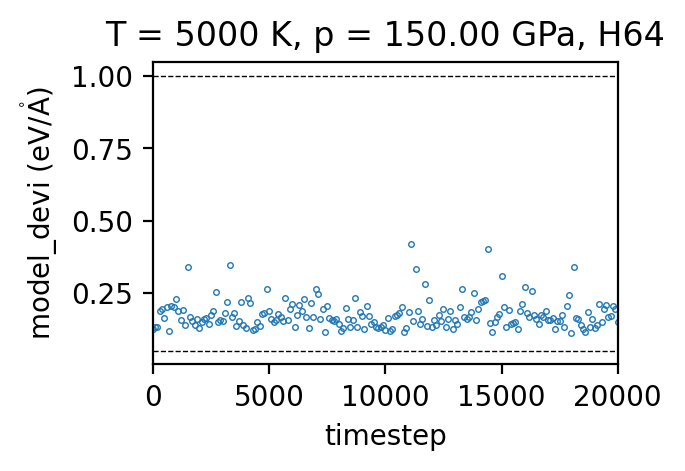

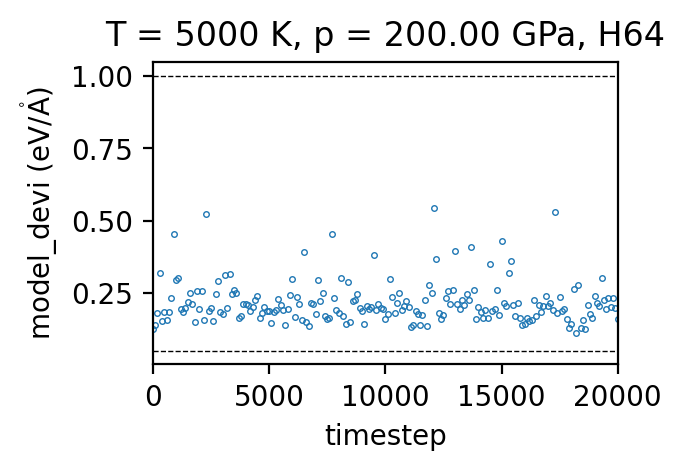

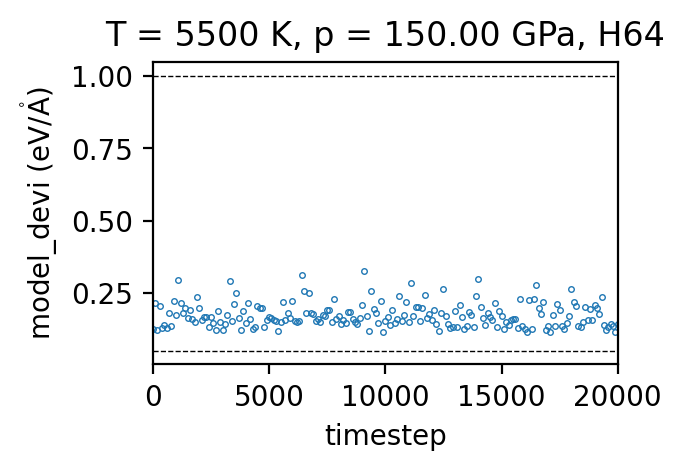

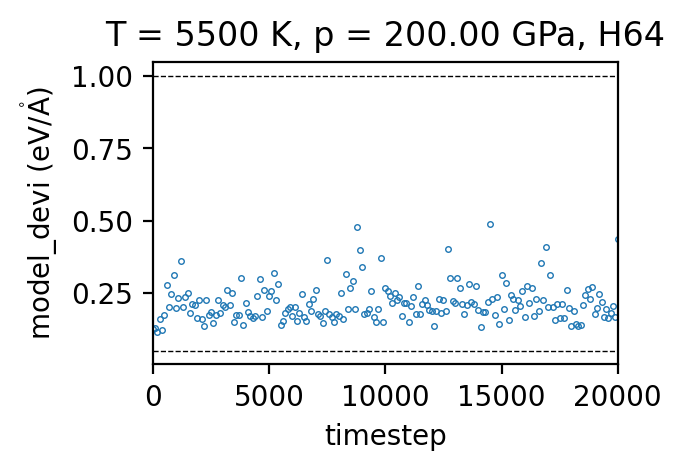

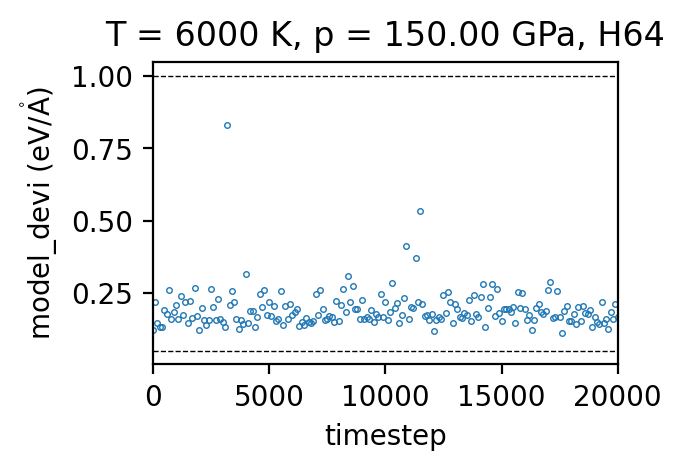

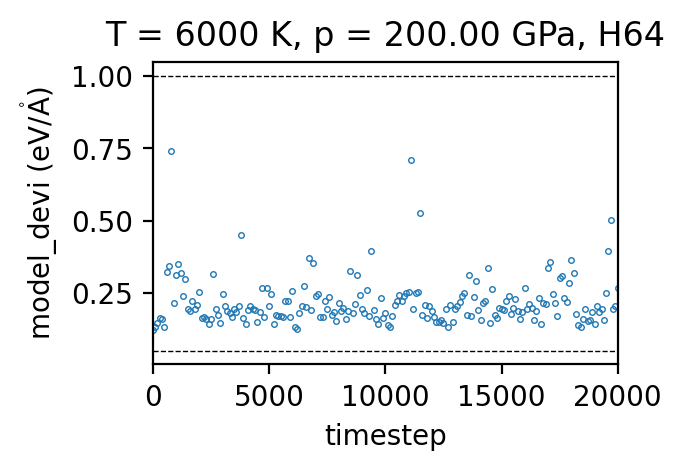

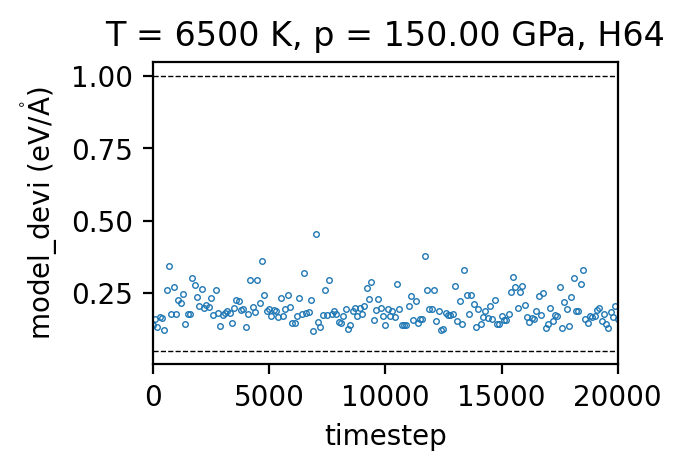

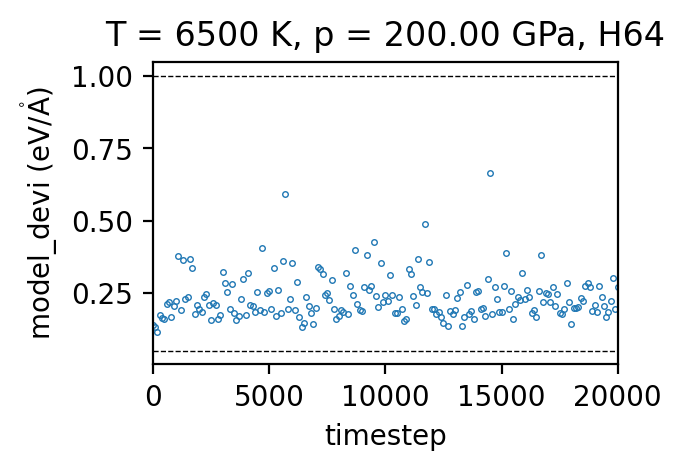

In [8]:
DIR='/data/home/djy4/work/hydrogen/dpgen/'
sys = DPGenSys(DIR)

N_case = 8
start_iter = 12

for case in range(N_case):
    fig, ax = plt.subplots(figsize=(3,2),dpi=200)
    
    for i in range(start_iter,start_iter+1):
        print("Iter.%.3d Case.%.3d"%(case,i))
        sys._plot_md(ax, iter_idx = i, sys_idx = 0, case_idx = case)


## Sampling

- 回头尽量探索到8ps，因为每次探索的构型比较少，可以增加到200个每次

In [2]:
def _hydrogen_phase():
    
    DIR = '/data/home/djy4/compare/hydrogen/'
    
    data = np.loadtxt(DIR+'melting.txt')
    ax.plot(data[:,0],data[:,1],'-k', lw=1.5, label='Melting')

    INTERVAL = 10
    data = np.loadtxt(DIR+'guo2022_MAT.txt')
    ax.plot(data[::INTERVAL,0],data[::INTERVAL,1],'-', color='grey', ms=4, mfc='none',mew=0.5, lw=1.5, )#label='MAT (Guo2022)')
    
    data = np.loadtxt(DIR+'geng2019_MAT.txt')
    ax.plot(data[::INTERVAL,0],data[::INTERVAL,1],'--', color='grey', ms=4, mfc='none',mew=0.5, lw=1.5, )#label='MAT (Geng2019)')
    
def _CH_shock():
    DIR='/data/home/djy4/compare/carbon/'

    #data = np.loadtxt(DIR + 'chen2022_hugo.txt')
    #ax.plot(data[:,0],data[:,1], '-o', color='orange', lw=0.5, ms=4, mew=1.0, mfc='w' ,label='Hugoniot (Bo)')

    data = np.loadtxt(DIR + 'kraus2017_hugo.txt')
    ax.plot(data[:,0],data[:,1], 'D', color='brown', lw=0.5, ms=4, mew=1.0, mfc='w' ,label='Expt. (Kraus)')

    data = np.loadtxt(DIR + 'kraus2017_2nd_hugo.txt')
    ax.plot(data[:,0],data[:,1], 'D', color='navy', lw=0.5, ms=4, mew=1.0, mfc='w' ,label='Double-shock (Kraus)')
    
    
def _carbon_phase():
    DIR='/data/home/djy4/compare/carbon/'
    #ax.text( 1.2 ,3e3,'Graphite')
    #ax.text( 20 ,3e3, 'Diamond')
    #ax.text( 10 ,7e3, 'Liquid')
    data = np.loadtxt(DIR + 'wang2005_GD.txt')
    ax.plot(data[:,1],data[:,0], '--k',lw=0.5, ms=2, mew=0.5, mfc='none' )
    
    data = np.loadtxt(DIR + 'wang2005_melt.txt')
    ax.plot(data[:,1],data[:,0], ':k',lw=0.5, ms=2, mew=0.5, mfc='none',) #label='Melting' )


DPGenerator System contains 14 Iterations
There are 2 initial configurations for exploration: 	 
H64 		
H128 		
Iter 000000  add 50 frames -- sys.000 (H64)
Iter 000001  add 200 frames -- sys.000 (H64)
Iter 000001  add 200 frames -- sys.001 (H128)
Iter 000002  add 200 frames -- sys.000 (H64)
Iter 000002  add 200 frames -- sys.001 (H128)
Iter 000003  add 200 frames -- sys.000 (H64)
Iter 000003  add 200 frames -- sys.001 (H128)
Iter 000004  add 200 frames -- sys.000 (H64)
Iter 000004  add 200 frames -- sys.001 (H128)
Iter 000005  add 124 frames -- sys.000 (H64)
Iter 000005  add 123 frames -- sys.001 (H128)
Iter 000006  add 284 frames -- sys.000 (H64)
Iter 000006  add 284 frames -- sys.001 (H128)
Iter 000007  add 142 frames -- sys.000 (H64)
Iter 000007  add 142 frames -- sys.001 (H128)
Iter 000008  add 62 frames -- sys.000 (H64)
Iter 000008  add 62 frames -- sys.001 (H128)
Iter 000009  add 142 frames -- sys.000 (H64)
Iter 000009  add 141 frames -- sys.001 (H128)
Iter 000010  add 300 frames

(300.0, 8000.0)

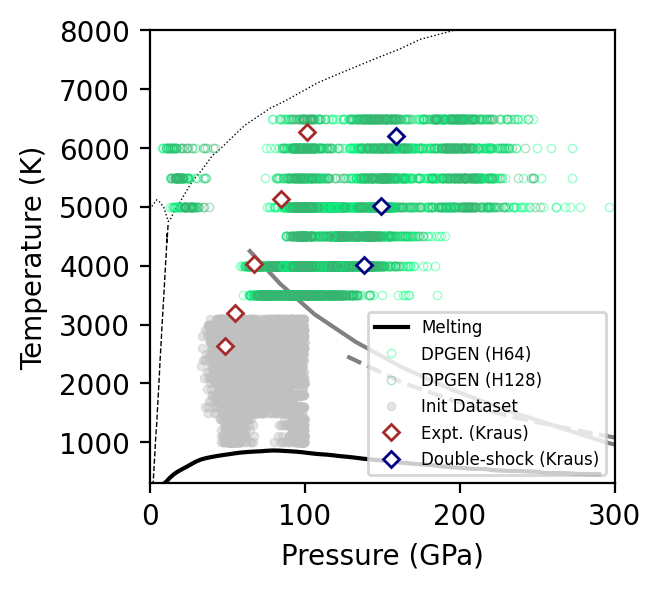

In [4]:
DIR='/data/home/djy4/work/hydrogen/dpgen/'

fig, ax = plt.subplots(figsize=(3,3),dpi=200)

_hydrogen_phase()
_carbon_phase()

sys = DPGenSys(DIR)
#for i in range(14):
#    sys._plot_sampling(ax, color='goldenrod', iter_idx = i, sys_idx = 0)
sys._all_sampling_plot(ax, color=['springgreen','mediumseagreen'])

dataset = SingleSys('/data/home/djy4/work/hydrogen/00.from-chang/merge/iters-100GPa-5/')
dataset._show_plot(ax, INTERVAL=1, INIT=0, color='silver',label='Init Dataset')

_CH_shock()

ax.legend(loc=4, fontsize=6)
ax.set_xlim(0, 300)
ax.set_ylim(300, 8e3)